# Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset

In [42]:
df = pd.read_csv("../data/housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Handle Missing Values

In [43]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Encode Categorical Column

In [44]:
df = df.join(
    pd.get_dummies(df["ocean_proximity"], drop_first=True)
).drop("ocean_proximity", axis=1)

bool_cols = ["INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
df[bool_cols] = df[bool_cols].astype(int)

# Feature Engineering

In [45]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Rooms per household
X["rooms_per_household"] = X["total_rooms"] / X["households"]

# Bedrooms per room
X["bedrooms_per_room"] = X["total_bedrooms"] / X["total_rooms"]

# Population per household
X["population_per_household"] = X["population"] / X["households"]

# Log-transform skewed features
for col in ["total_rooms", "total_bedrooms", "population", "households"]:
    X[col] = np.log(X[col] + 1)

## Train-Test Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Evaluate Model

In [ ]:
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R²: {r2:.4f}")

In [ ]:
importances = rf_model.feature_importances_
features = X_train.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

In [50]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="r2")
print("Mean CV R²:", cv_scores.mean())

Mean CV R²: 0.8078569368747333


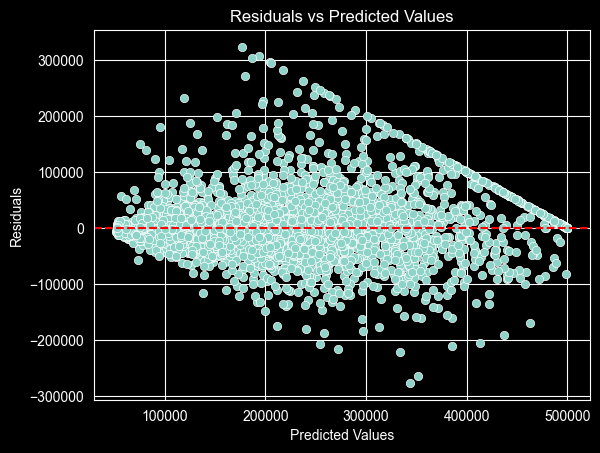

In [51]:
import seaborn as sns

residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

## Save the Model

In [52]:
import joblib

joblib.dump(rf_model, "../model/random_forest_model.pkl")

['../model/random_forest_model.pkl']